# Sales Analysis

#### Import necessary libraries

In [34]:
import pandas as pd
import os

#### Merge data from each month into one CSV

In [51]:
df = pd.read_csv("D:/Portfolio/Project/Project Sales Solving/Sales_April_2019.csv")

files = [file for file in os.listdir('D:/Portfolio/Project/Project Sales Solving')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("D:/Portfolio/Project/Project Sales Solving/"+file)
    all_months_data = pd.concat([all_months_data, df])     
                      
# all_months_data.head()
        
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [138]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27


### Clean up the data!

The first step in this is figuring out what things need to clean. In practice, that I find things need to clean as I perform operations and get errors. Based on the error, I decide how way should go about cleaning the data

#### Drop rows of NAN

In [140]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27


#### Get rid of text in orther date column

In [141]:
all_data = all_data[all_data['Order Date'].str[0:1] != 'Or']

#### Make columns correct type

In [142]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27


### Augment data with additional cols

#### Add month column (alternative method)

In [143]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46,4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27,4


#### Add sales column

In [202]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data['Sales'] = all_data['Sales'].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46,4,23,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,99,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,600,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,11,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27,4,11,Los Angeles (CA),9,27,1


#### Add city column

In [203]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46,4,23,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,99,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,600,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,11,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27,4,11,Los Angeles (CA),9,27,1


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month?

In [356]:
results = all_data.groupby('Month')['Sales'].sum()
results

Month
1     1815143
2     2193165
3     2795907
4     3377215
5     3140375
6     2567871
7     2637209
8     2235667
9     2088915
10    3721615
11    3186604
12    4594929
Name: Sales, dtype: int32

range(1, 13)


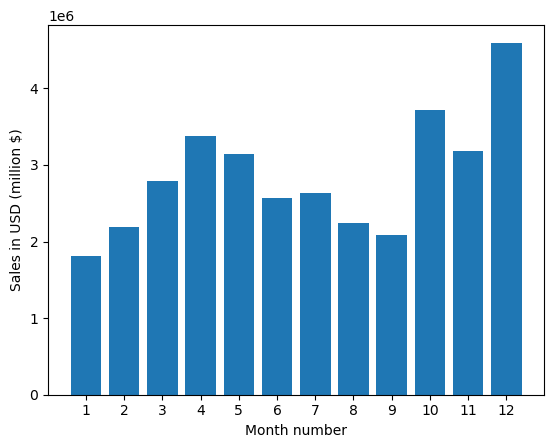

In [354]:
import matplotlib.pyplot as plt

months = range(1, 13)
print(months)

results = all_data.groupby('Month').sum(numeric_only=True)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD (million $)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [352]:
results = all_data.groupby('City').sum(numeric_only=True)
results

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,,
Atlanta (GA),3423838407,16602,2779908.20,104794,2784555,214264,442932,14881
Austin (TX),2280982185,11153,1809873.61,69829,1812297,141946,289060,9905
Boston (MA),4598265261,22528,3637409.77,141112,3646904,288225,590442,19934
Dallas (TX),3415643578,16730,2752627.82,104620,2757017,214390,435155,14820
Los Angeles (CA),6811084693,33289,5421435.23,208325,5430629,427444,866638,29605
New York City (NY),5736333884,27932,4635370.83,175741,4645903,357696,733598,24876
Portland (ME),563266345,2750,447189.25,17144,447951,35211,72856,2455
Portland (OR),2305594747,11303,1860558.22,70621,1863342,144421,295533,10010
San Francisco (CA),10304443952,50239,8211461.74,315520,8229136,643265,1319477,44732


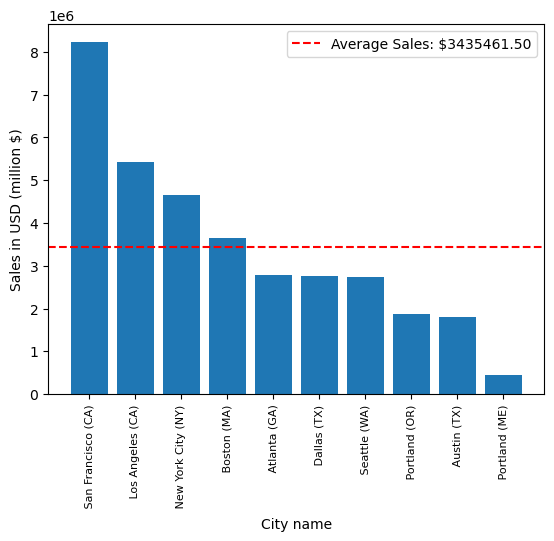

In [353]:
# Calculate the sum of sales for each city
results = all_data.groupby('City')['Sales'].sum()

# Calculate the average sales
average_sales = results.mean()

# Sort cities by sales in descending order
sorted_results = results.sort_values(ascending=False)

# Create a sorted list of city names
sorted_cities = sorted_results.index.tolist()

# Create the bar chart with sorted city names on the x-axis
plt.bar(sorted_cities, sorted_results.values)
plt.xticks(sorted_cities, rotation='vertical', size=8)  # Set x-axis ticks to sorted city names
plt.ylabel('Sales in USD (million $)')
plt.xlabel('City name')

# Plot the average line
plt.axhline(y=average_sales, color='r', linestyle='--', label=f'Average Sales: ${average_sales:.2f}')
plt.legend()

plt.show()

#### Question 3: What time should we display advertisments to maximize  likelihood of customer's buying product?

In [300]:
all_data['Hour'] = all_data['Time'].apply(lambda x: x.split(':')[0])
all_data['Minute'] = all_data['Time'].apply(lambda x: x.split(':')[1])
all_data['Count'] = 1

all_data['Hour'] = all_data['Hour'].astype(int)
all_data['Minute'] = all_data['Minute'].astype(int)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46,4,23,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,99,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,600,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,11,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27,4,11,Los Angeles (CA),9,27,1


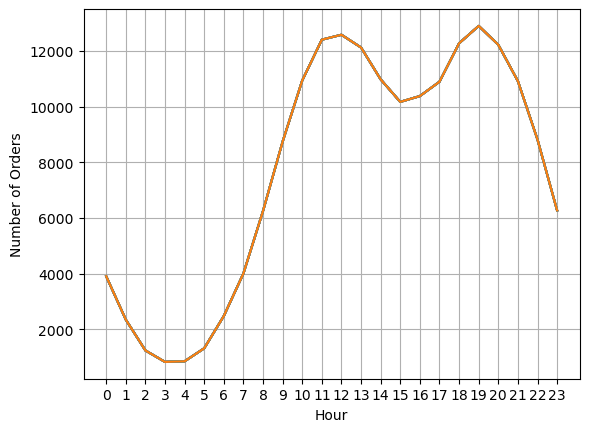

In [200]:
hours = [hour for hour, df in all_data.groupby('Hour')]

Hours_count = all_data.groupby(['Hour']).count()
Hours_sort = Hours_count.sort_values(['Hour'],ascending = True)
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


#### Question 4: What products are most often sold together?

In [350]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2651,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2672,179128,"iPhone,Apple Airpods Headphones"
2707,179162,"Google Phone,USB-C Charging Cable"
2772,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [229]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why it sold the most?

In [230]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",8:46,4,23,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,99,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,600,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,11,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",9:27,4,11,Los Angeles (CA),9,27,1


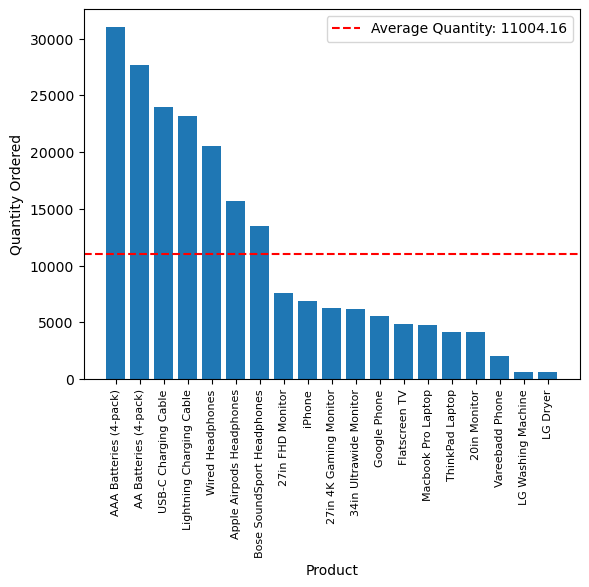

In [343]:
# Calculate the sum of quantity ordered for each product
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Calculate the average quantity ordered
average_quantity = quantity_ordered.mean()

# Sort products by quantity ordered in descending order
sorted_products = quantity_ordered.sort_values(ascending=False)

# Create a sorted list of product names
sorted_product_names = sorted_products.index.tolist()

# Create the bar chart with sorted product names on the x-axis
plt.bar(sorted_product_names, sorted_products.values)
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')

# Plot the average line
plt.axhline(y=average_quantity, color='r', linestyle='--', label=f'Average Quantity: {average_quantity:.2f}')
plt.legend()

plt.show()


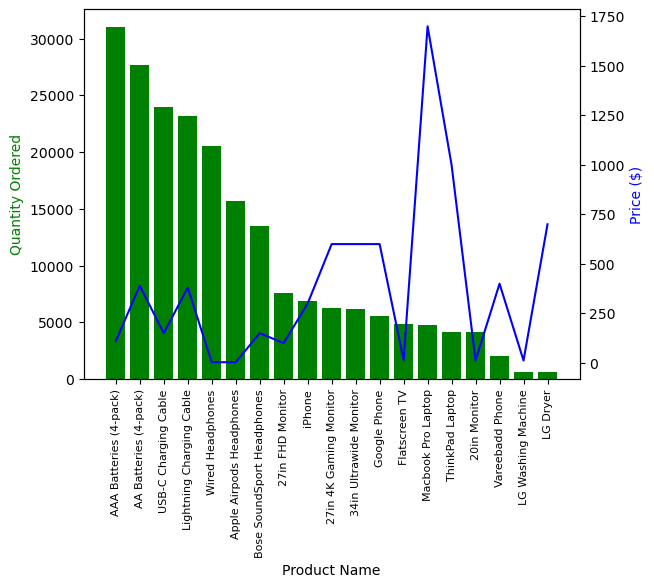

In [345]:
# Calculate the sum of quantity ordered for each product
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Calculate the average price for each product
prices = product_group['Price Each'].mean()

# Sort products by quantity ordered in descending order
sorted_products = quantity_ordered.sort_values(ascending=False)

# Create a sorted list of product names
sorted_product_names = sorted_products.index.tolist()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sorted_product_names, sorted_products, color='g')  # Use sorted_product_names here
ax2.plot(sorted_product_names, prices, color='b')  # Use sorted_product_names here

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Set x-axis ticks and labels
ax1.set_xticks(range(len(sorted_product_names)))
ax1.set_xticklabels(sorted_product_names, rotation='vertical', size=8)  # Use sorted_product_names here

plt.show()